# Notebook for MULTEM analysis

In [1]:
%matplotlib notebook
import numpy as np
import mul2py as m2p
from pathlib import Path
import hyperspy.api as hs
import h5py as hdf

## EWRS

In [2]:
#data_path = Path(r'C:\Users\emilc\OneDrive - NTNU\MULTEM_Results\EWRS_results.mat')
data_path = Path(r'C:/Users/emilc/Documents/PhDScripts/TEMGeminiCentre/mul2py/mul2py/matlab/ewrs_test_results.ecmat')
#data = m2p.io.HDFReader(data_path)
#data.remove_excess_dimensions()
ewrs = m2p.build_ewrs(data_path)

Could not set general important simulation parameter:
'DictionaryTreeBrowser' object has no attribute 'E_0'
Could not set important EWRS simulation parameter:
'DictionaryTreeBrowser' object has no attribute 'cond_lens_c_10'


<IPython.core.display.Javascript object>


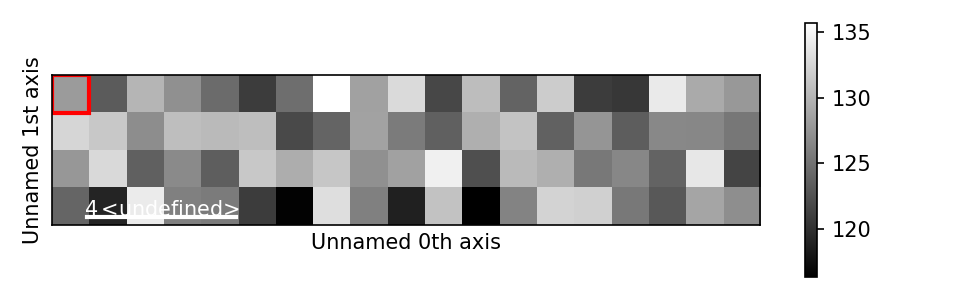

<IPython.core.display.Javascript object>


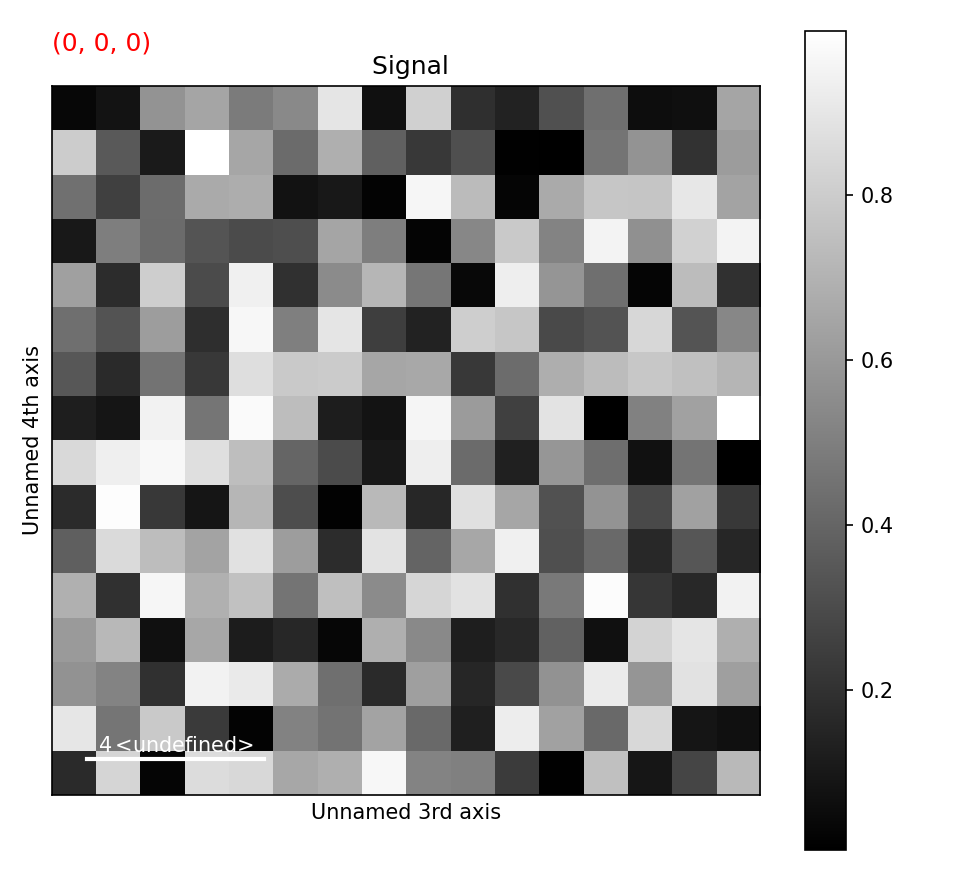

In [3]:
ewrs.plot()

In [ ]:
data = [[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]]
        
A = np.array(data, order='F')
A

In [ ]:
data

In [ ]:
data.results.images.content

In [ ]:
data = m2p.io.HDFReader(data_path)

In [ ]:
hs.signals.Signal2D(np.array(data.results.images.content), )

In [ ]:
data.remove_excess_dimensions()

In [ ]:
np.shape(data.results.images.content)

In [ ]:
data.results.thick

In [ ]:
ewrs.plot()

In [ ]:
ewrs

In [ ]:
hdf_file = hdf.File(data_path)

In [ ]:
hdf_file['results']['thicknesses']

In [ ]:
content = m2p.io.HDFContent('thicknesses', hdf_file['results']['thicknesses'], hdf_file)

In [ ]:
data.remove_excess_dimensions()

In [ ]:
data.results['thick'] = m2p.io.HDFContent('thick', data.results.thicknesses.thicknesses0.resolved_reference.content, data.file)

In [ ]:
data

In [ ]:
print(data)

In [ ]:
data.content2dict()

In [ ]:
content.remove_excess_dimensions()

In [ ]:
content.

In [ ]:
data.results.thicknesses

In [ ]:
ewrs

## CBED

In [ ]:
data_path = Path(r'C:\Users\emilc\OneDrive - NTNU\MULTEM_Results\CBED_results.mat')
cbed = m2p.build_cbed(data_path)

# Convert datasets

In [ ]:
class Point:
    def __init__(self, x, y):
        self.x, self.y = x, y
    def __iter__(self):
        keys = self.__dict__.keys()
        for key in keys:
            if key[0] == '_':
                pass
            else:
                yield (key, getattr(self, key))


In [ ]:
p = Point(1, 2)

In [ ]:
for a in p:
    print(a)

In [ ]:
class foo(object):
    
    def __init__(self, value):
        self._value = value
        
    @property
    def value(self):
        return self._value
    
    @value.setter
    def value(self, value):
        self._value = value
        
    def __repr__(self):
        return '{self.__class__.__name__}({self.value!r})'.format(self=self)

f = foo(2)
print(f)

In [ ]:
f.value = 3

In [ ]:
f.value

In [ ]:
class foo(object):
    
    def __init__(self, value, name, hidden_name):
        self.value = value
        self.name = name
        self._name = hidden_name
        
    def __repr__(self):
        return '{self.__class__.__name__}({self.value!r})'.format(self=self)
    
    def __getitem__(self, item):
        return getattr(self, item)
    
    def __iter__(self):
        for key in self.__dict__.keys():
            yield self[key]

class bar(object):
    
    def __init__(self, value):
        self.value = value
    
    @property
    def data(self):
        return self.value
    
    def __repr__(self):
        return '{self.__class__.__name__}({self.value!r})'.format(self=self)
    
    def __call__(self):
        return self.data
f = foo(bar(2), 'f', 'Boo')

In [ ]:
f['value']

In [ ]:
val = f.value()

In [ ]:
f.value.data

In [ ]:
print(f)

In [ ]:
for item in f:
    print(item)

In [ ]:
f['_name']

In [ ]:
data = m2p.io.HDFReader(data_path)

In [ ]:
data.remove_excess_dimensions()

In [ ]:
data.results.input.bwl()

In [ ]:
data.results.dx

In [ ]:
for attribute, item in data.results.__dict__.items():
    if attribute[0] == '_' or any([attribute == att for att in ('depth', 'shape', 'content')]):
        pass
    else:
        item.remove_excess_dimensions()

In [ ]:
data

In [ ]:
data.results.remove_excess_dimensions()

In [ ]:
data.close()

In [ ]:
data.results.dx._content

In [ ]:
data.remove_excess_dimensions()

In [ ]:
data.results.images.remove_excess_dimensions()

In [ ]:
e

In [ ]:
a = 1
try:
    a.foo
except AttributeError as e:
    print(e.args)

In [ ]:
for attribute, item in data.__dict__.items():
    if not(attribute=='file' or attribute == '#refs#'):
        item.remove_excess_dimensions()

In [ ]:
[item.remove_exess_dimensions() for attribute, item in data.results.__dict__.items() if not (attribute=='file' or attribute == '#refs#')]

In [ ]:
data_path = Path(r'C:\Users\emilc\OneDrive - NTNU\MULTEM_Results\CBED_results.mat')
signal, data = m2p.buildtools.builders.load_results(data_path)

In [ ]:
data.remove_excess_dimensions()

In [ ]:
data

In [ ]:
isinstance(data.results.dx, data.results.__class__)

In [ ]:
data.results.dx

In [ ]:
data.remove_excess_dimensions('results')

In [ ]:
data.results.dy

In [ ]:
data.remove_excess_dimensions()

In [ ]:
data.results.thicknesses.remove_excess_dimensions()

In [ ]:
data.results.thicknesses

In [ ]:
data.results.thick.remove_excess_dimensions()

In [ ]:
data.results.dx

In [ ]:
data.results.dx

In [ ]:
data.remove_excess_dimensions()

In [ ]:
data.results.dx

In [ ]:
data.results.dx.remove_excess_dimensions()

In [ ]:
data.results.dx

In [ ]:
signal = signal.transpose(navigation_axes = [1], signal_axes=[0,2], optimize = True)

In [ ]:
data.results.dx.content

In [ ]:
signal.plot()

## EWRS

### Load data

In [ ]:
data_path = Path(r'C:\Users\emilc\OneDrive - NTNU\MULTEM_Results\EWRS_results.hspy')

In [ ]:
signal = hs.load(str(data_path), lazy=True)

In [ ]:
key = 'E_0'
signal.original_metadata['SimulationParameters'][key]

### Modify `axes_manager`

In [ ]:
signal.axes_manager['z'].offset = 2.025
signal.axes_manager['z'].scale = 2.025
signal.axes_manager['z'].units = 'Å'
signal.axes_manager['dx'].offset=0
signal.axes_manager['dy'].offset=0

### Make a single image from a given `inav`

In [ ]:
fig, ax = m2p.exporttools.make_image(signal, [0, 0, -3], False, 'annotate', 'mark_atoms',
                                     figure={'figsize': (4, 4),
                                             'dpi': 300})

### Export several images
Convenient for making videos in imageJ

In [ ]:
counter = 0
thicknesses = [0, 9, 19, 29, 39] #Thicknesses to use
for s in signal:
    if signal.axes_manager.indices[-1] in thicknesses:
        fig, ax = m2p.exporttools.make_image(signal, None, True, 'annotate', 'mark_atoms',
                                             figure={'figsize': (4, 4),
                                                     'dpi': 300})
        
        frame_no = '{counter:0{pad:.0f}.0f}'.format(counter=counter, pad=3)
        fig.savefig(data_path.with_name('{stem}_{size:.0f}in_{dpi:.0f}dpi_{number}.png'.format(stem=data_path.stem, number=frame_no, size = fig.get_size_inches()[0], dpi = fig.dpi)))
        
        plt.close(fig)
        
        counter += 1
    else:
        pass

In [ ]:
signal.plot()